In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import seaborn as sns
import spacy

### Sentiment Analysis

In [282]:
df = pd.read_csv('news_10_category_sa_3k.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'news_10_category_sa_3k.csv'

In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yaoyao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
vader_analyzer = SentimentIntensityAnalyzer()

In [13]:
def get_top_n_bigram(corpus, vectorize, n=None):
    vec = vectorize.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], 
                        reverse=True)
    return words_freq[:n]

In [16]:
df.head()

,category,text
0,PARENTING,dad just stressed mom according new poll
1,TRAVEL,summer luxury italy sunbathed piazza colorful ...
2,BUSINESS & FINANCES,awareness brings reward home call money game b...
3,POLITICS,come folding napkin dont mess michele bachmann
4,GROUPS VOICES,dear white people netflix teaser just dropped ...


In [20]:
df['category'].value_counts()

POLITICS               399
WELLNESS               374
PARENTING              359
ENTERTAINMENT          332
GROUPS VOICES          312
STYLE & BEAUTY         289
TRAVEL                 276
BUSINESS & FINANCES    229
WORLD NEWS             223
FOOD & DRINK           207
Name: category, dtype: int64

In [23]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
common_words = get_top_n_bigram(df['text'], vectorizer, 20)

categories = df['category'].unique()
common_words_by_cat = {}
for cat in categories:
    df_cat = df[df['category'] == cat]
    common_words = get_top_n_bigram(df_cat['text'], vectorizer, 20)
    df_com = pd.DataFrame(common_words, columns = ['text' , 'count'])
    common_words_by_cat[cat] = df_com

plt.figure(figsize=(16,12))
for i, cat in enumerate(categories):
    plt.subplot(2,5,i+1)
    common_words_by_cat[cat].groupby('text').sum()['count'].sort_values(
        ascending=False).plot(kind='bar', title="Top 20 bigrams in: " + cat)
    
plt.tight_layout()



In [25]:
df2.groupby()

,text,count
0,donald trump,65
1,new york,42
2,new year,22
3,want sure,22
4,sure check,22


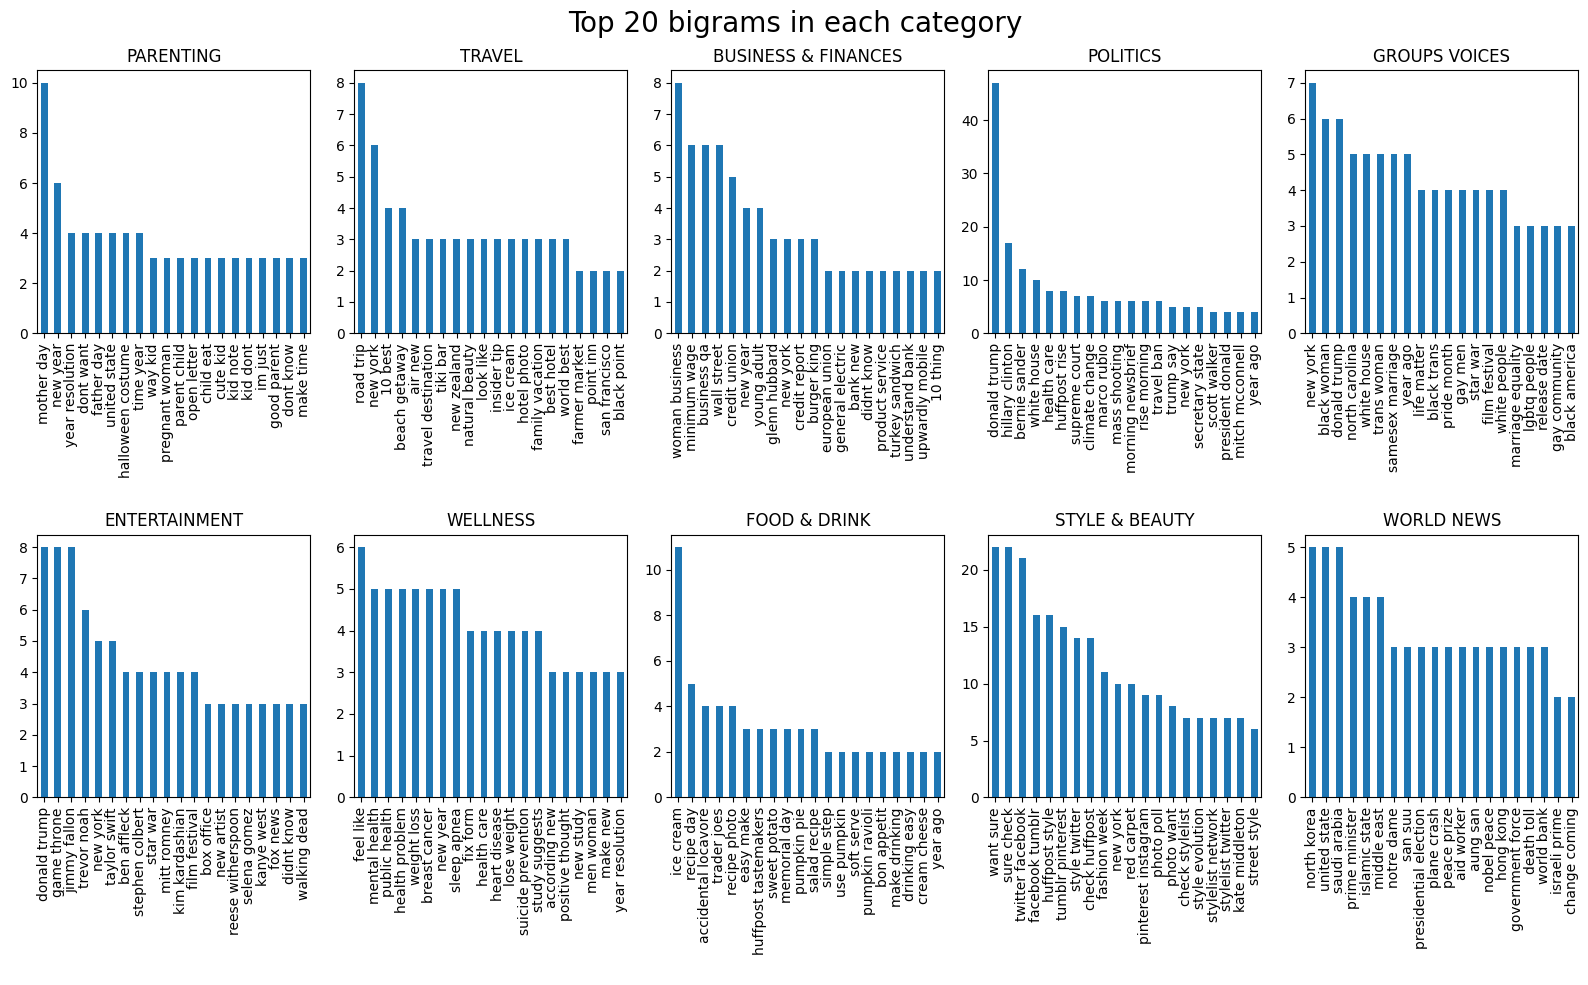

In [31]:

plt.figure(figsize=(16,10))
for i, cat in enumerate(categories):
    plt.subplot(2,5,i+1)
    common_words_by_cat[cat].groupby('text').sum()['count'].sort_values(
        ascending=False).plot(kind='bar', title= cat)
    plt.xlabel(' ')
    
plt.suptitle('Top 20 bigrams in each category', fontsize=20)
plt.tight_layout()

In [61]:


def plot_named_entity_barchart(text):
    #text = df['text']
    nlp = spacy.load('en_core_web_sm')
    def _get_ner(text):
        doc = nlp(text)
        return [X.label_ for X in doc.ents]
    ent = text.apply(lambda x: _get_ner(x))
    ent = [x for sub in ent for x in sub]
    counter = Counter(ent)
    count = counter.most_common()
    #x, y = map(list, zip(*count))
    #sns.barplot(x=y, y=x)
    return count
    # set title
    #return pd.DataFrame({'entity':x, 'count':y, 'category':text.name})

横坐标是category, 柱状图是entity的叠加

In [69]:
count_cat_dict = {}
entity_unique = []
for i, cat in enumerate(categories):
    count = plot_named_entity_barchart(df[df['category'] == cat]['text'])
    count_cat_dict[cat] = count
    print(len(count))
    entity_unique.extend([x[0] for x in count])
entity_unique = list(set(entity_unique))
for cat in categories:
    count = count_cat_dict[cat]
    count = {x[0]:x[1] for x in count}
    count = {x:count.get(x, 0) for x in entity_unique}
    count_cat_dict[cat] = count
count_cat_dict

13
13
14
16
16
13
13
13
13
15


{'PARENTING': {'PRODUCT': 1,
  'LOC': 1,
  'WORK_OF_ART': 0,
  'GPE': 14,
  'ORG': 23,
  'ORDINAL': 15,
  'NORP': 15,
  'PERCENT': 1,
  'LANGUAGE': 0,
  'DATE': 99,
  'PERSON': 74,
  'QUANTITY': 1,
  'LAW': 1,
  'MONEY': 0,
  'CARDINAL': 133,
  'FAC': 0,
  'TIME': 20,
  'EVENT': 0},
 'TRAVEL': {'PRODUCT': 1,
  'LOC': 22,
  'WORK_OF_ART': 0,
  'GPE': 130,
  'ORG': 56,
  'ORDINAL': 17,
  'NORP': 45,
  'PERCENT': 0,
  'LANGUAGE': 0,
  'DATE': 95,
  'PERSON': 50,
  'QUANTITY': 2,
  'LAW': 0,
  'MONEY': 0,
  'CARDINAL': 137,
  'FAC': 2,
  'TIME': 15,
  'EVENT': 1},
 'BUSINESS & FINANCES': {'PRODUCT': 2,
  'LOC': 9,
  'WORK_OF_ART': 0,
  'GPE': 29,
  'ORG': 49,
  'ORDINAL': 10,
  'NORP': 22,
  'PERCENT': 6,
  'LANGUAGE': 0,
  'DATE': 52,
  'PERSON': 57,
  'QUANTITY': 2,
  'LAW': 0,
  'MONEY': 1,
  'CARDINAL': 86,
  'FAC': 0,
  'TIME': 9,
  'EVENT': 1},
 'POLITICS': {'PRODUCT': 0,
  'LOC': 2,
  'WORK_OF_ART': 1,
  'GPE': 121,
  'ORG': 135,
  'ORDINAL': 17,
  'NORP': 105,
  'PERCENT': 6,
  'LA

In [67]:
len(entity_unique)

18

In [98]:
count_cat_list = {}
for cat in categories:
    count = count_cat_dict[cat]
    #print(count)
    count = [v for k,v in count.items()]
    #count = [count.get(x, 0) for x in entity_unique]
    count_cat_list[cat] = count
df_cat_list = pd.DataFrame(count_cat_list, index=entity_unique)
df_cat_list = df_cat_list.T
df_cat_list['total_count'] = df_cat_list.sum(axis=1)
df_cat_list.sort_values('total_count', ascending=False, inplace=True)
    

In [101]:
df_cat_list

,PRODUCT,LOC,WORK_OF_ART,GPE,ORG,ORDINAL,NORP,PERCENT,LANGUAGE,DATE,PERSON,QUANTITY,LAW,MONEY,CARDINAL,FAC,TIME,EVENT,total_count
POLITICS,0,2,1,121,135,17,105,6,0,106,260,2,1,2,91,3,5,3,860
WORLD NEWS,1,15,2,198,35,22,115,3,0,77,64,5,0,0,79,5,7,3,631
TRAVEL,1,22,0,130,56,17,45,0,0,95,50,2,0,0,137,2,15,1,573
STYLE & BEAUTY,1,2,1,39,51,18,22,1,0,133,155,0,0,1,93,0,10,0,527
ENTERTAINMENT,3,2,3,48,50,12,23,0,0,74,218,1,0,0,69,0,9,1,513
GROUPS VOICES,2,6,1,72,65,17,36,0,2,101,114,1,1,1,79,3,6,0,507
PARENTING,1,1,0,14,23,15,15,1,0,99,74,1,1,0,133,0,20,0,398
WELLNESS,1,1,0,24,34,22,9,2,0,97,46,8,0,0,139,1,13,0,397
BUSINESS & FINANCES,2,9,0,29,49,10,22,6,0,52,57,2,0,1,86,0,9,1,335
FOOD & DRINK,1,0,0,16,18,3,18,2,0,50,38,1,1,0,89,1,10,0,248


In [102]:
# drop columns if any value is less than 10
df_cat_list_10 = df_cat_list.loc[:, (df_cat_list > 10).any(axis=0)]
df_cat_list_10

,LOC,GPE,ORG,ORDINAL,NORP,DATE,PERSON,CARDINAL,TIME,total_count
POLITICS,2,121,135,17,105,106,260,91,5,860
WORLD NEWS,15,198,35,22,115,77,64,79,7,631
TRAVEL,22,130,56,17,45,95,50,137,15,573
STYLE & BEAUTY,2,39,51,18,22,133,155,93,10,527
ENTERTAINMENT,2,48,50,12,23,74,218,69,9,513
GROUPS VOICES,6,72,65,17,36,101,114,79,6,507
PARENTING,1,14,23,15,15,99,74,133,20,398
WELLNESS,1,24,34,22,9,97,46,139,13,397
BUSINESS & FINANCES,9,29,49,10,22,52,57,86,9,335
FOOD & DRINK,0,16,18,3,18,50,38,89,10,248


In [110]:
columns_keep = df_cat_list_10.columns.to_list()
columns_keep = columns_keep[:-1]
columns_keep 

['LOC', 'GPE', 'ORG', 'ORDINAL', 'NORP', 'DATE', 'PERSON', 'CARDINAL', 'TIME']

In [119]:
df_cat_list_10 = df_cat_list_10[['PERSON', 'DATE', 'CARDINAL', 'NORP', 'GPE', 'ORG', 'ORDINAL', 'TIME', 'LOC']]

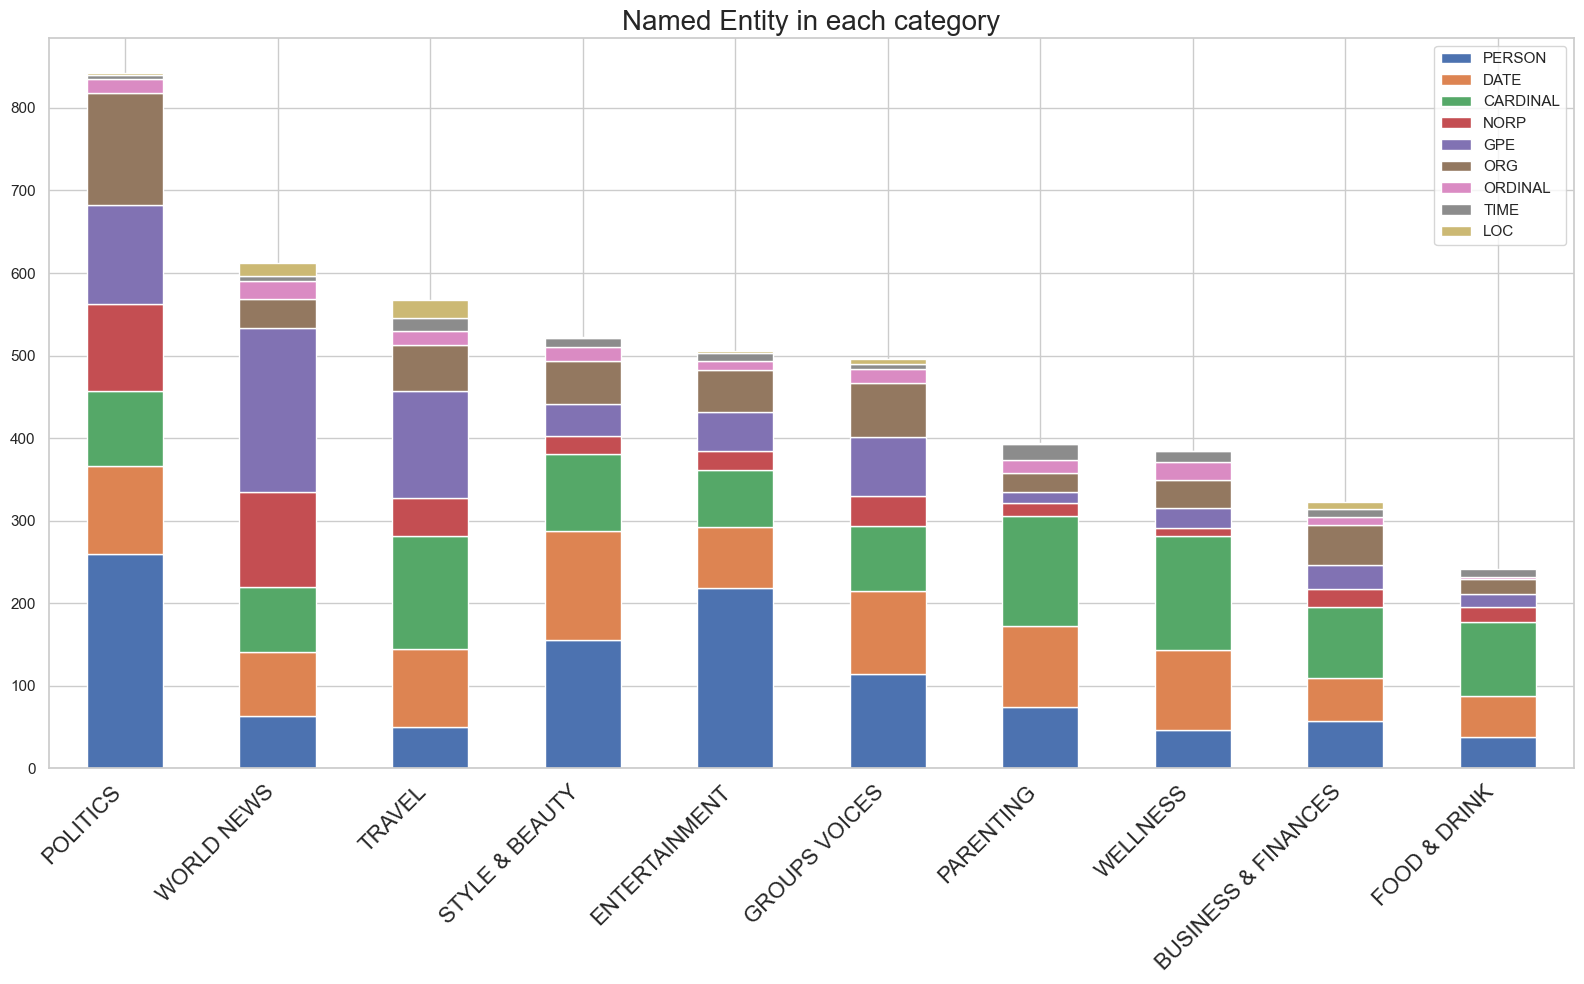

In [120]:
#['PRODUCT', 'LOC', 'WORK_OF_ART', 'GPE', 'ORG', 'ORIGINAL', 'NORP', 'PERCENT', 'LANGUAGE', 'DATE', 'PERSON', 'QUANTITY',  ]
df_cat_list_10.plot.bar(stacked=True, figsize=(16,10))
#plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', borderaxespad=0.)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.title('Named Entity in each category', fontsize=20)
plt.tight_layout()
plt.show()

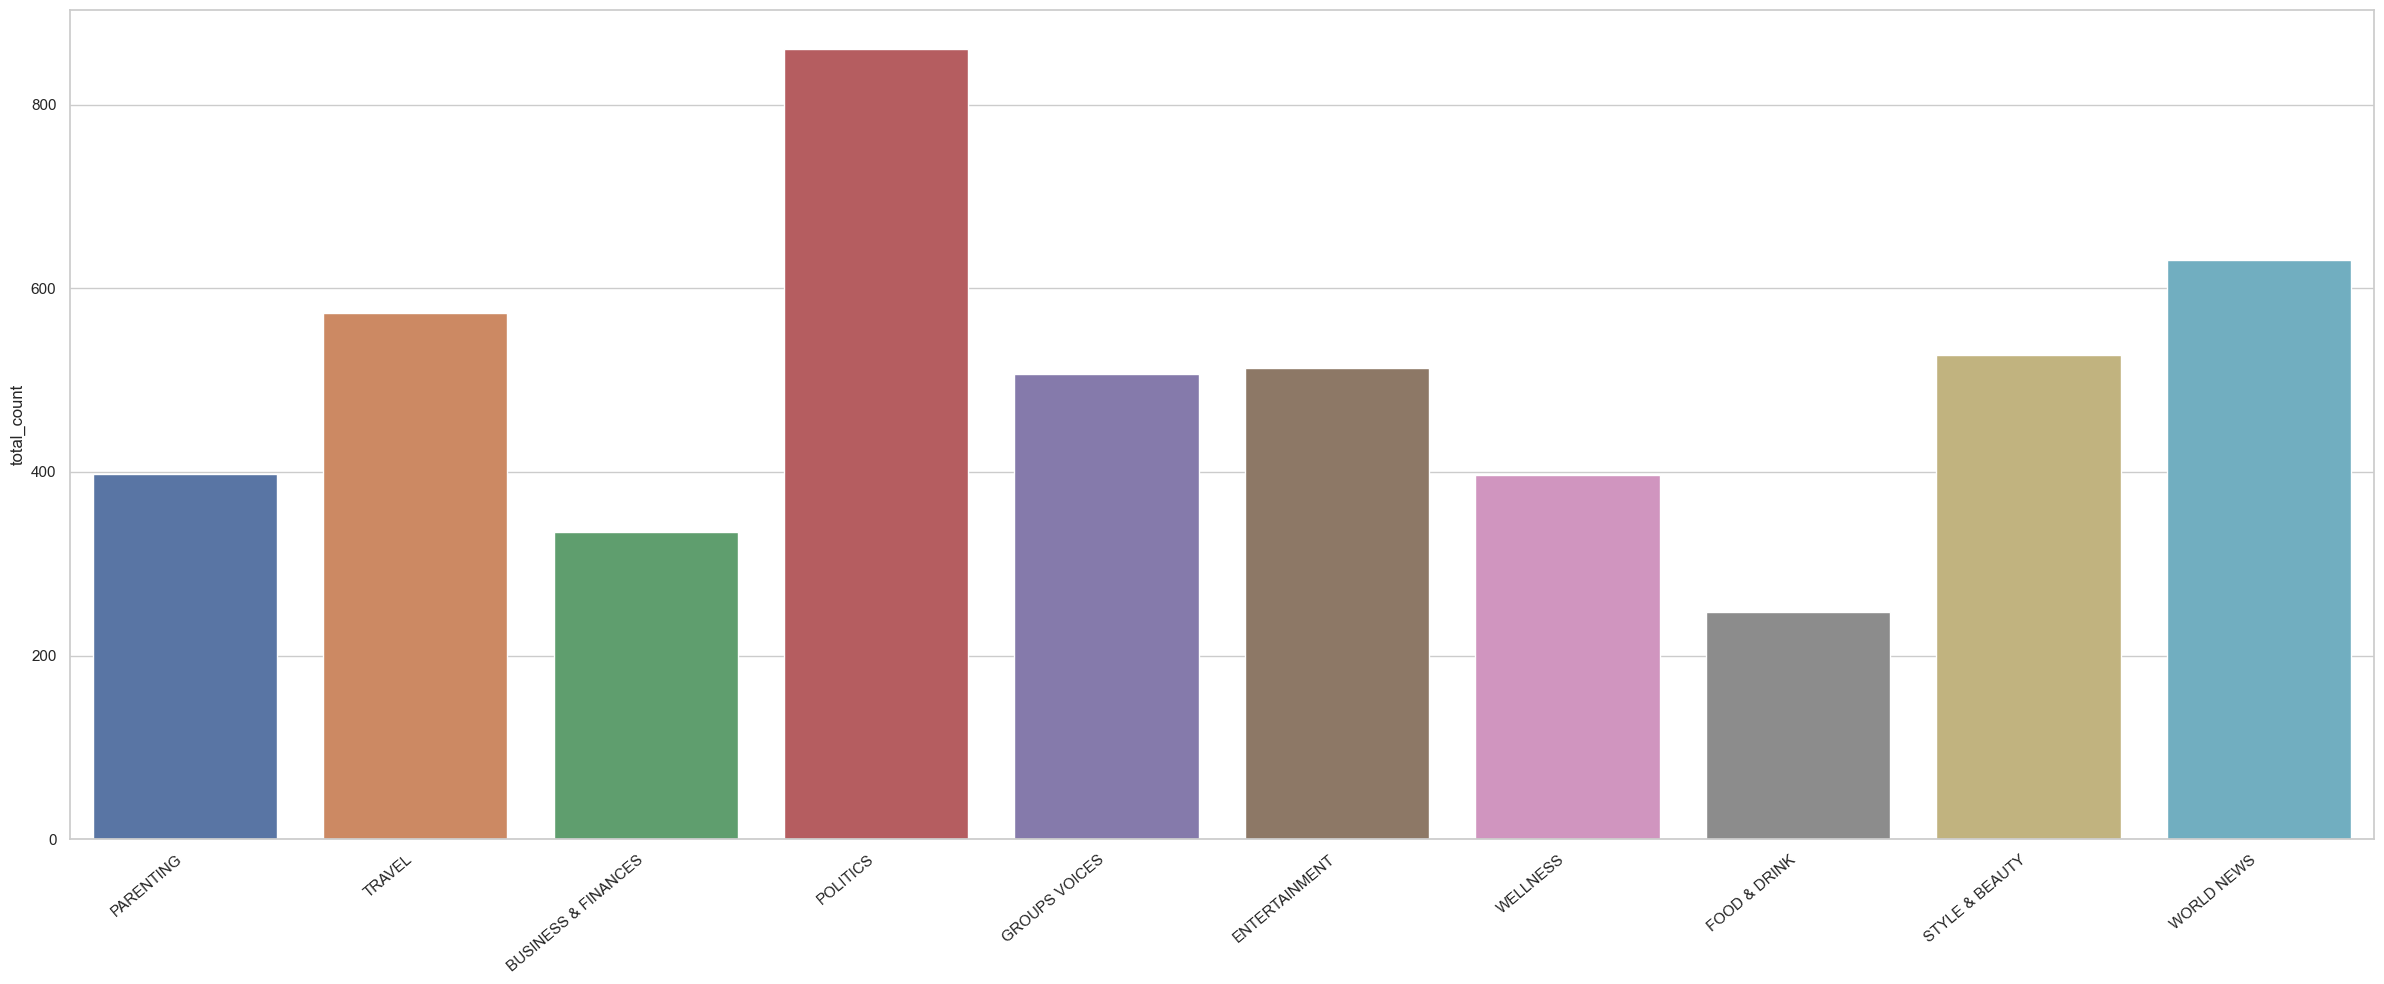

In [81]:
sns.set(style="whitegrid")
sns.set_context({"figure.figsize": (24, 10)})
ax = sns.barplot(x=df_cat_list.index, y="total_count", data=df_cat_list)
bottom_plot = sns.barplot(x=df_cat_list.index, y="ORG", data=df_cat_list, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [133]:
df_cat_list_T = df_cat_list.T[:-1]
df_cat_list_T['total_count'] = df_cat_list_T.sum(axis=1)
df_cat_list_T = df_cat_list_T.sort_values(by='total_count', ascending=False)

<Axes: xlabel='total_count'>

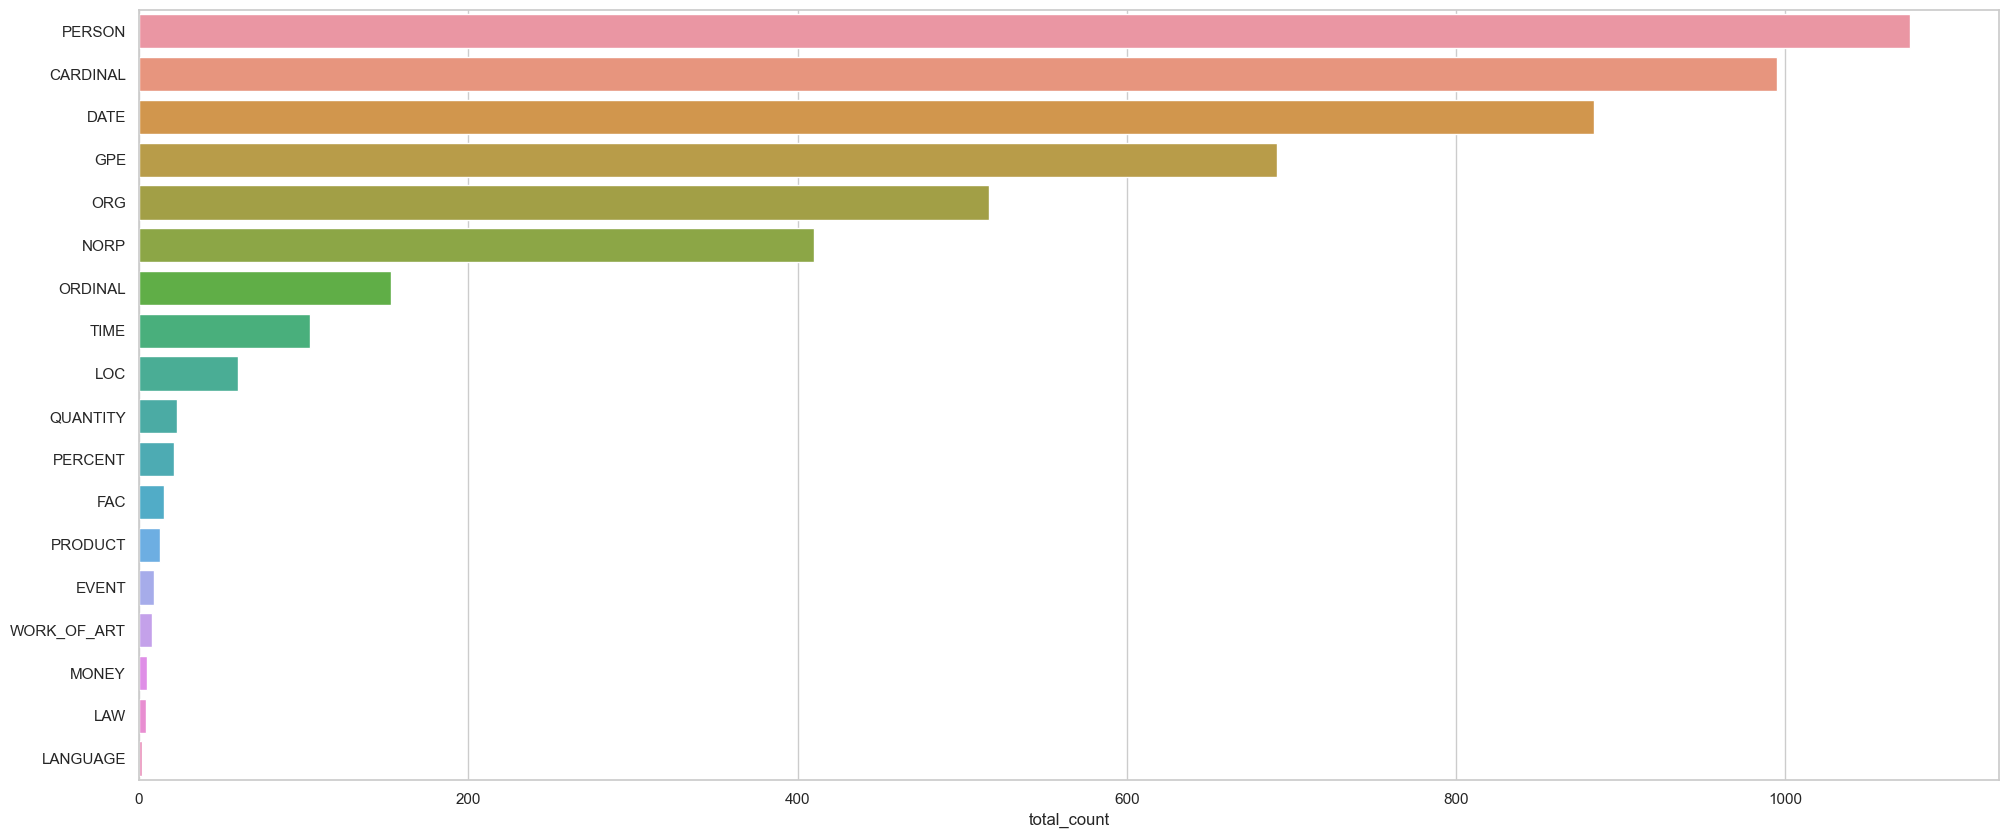

In [134]:
x = df_cat_list_T['total_count']
y = df_cat_list_T.index
sns.barplot(x=x, y=y)

### Sentiment Analysis

In [137]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yaoyao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [138]:
df['sa'] = df['text'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

<Axes: >

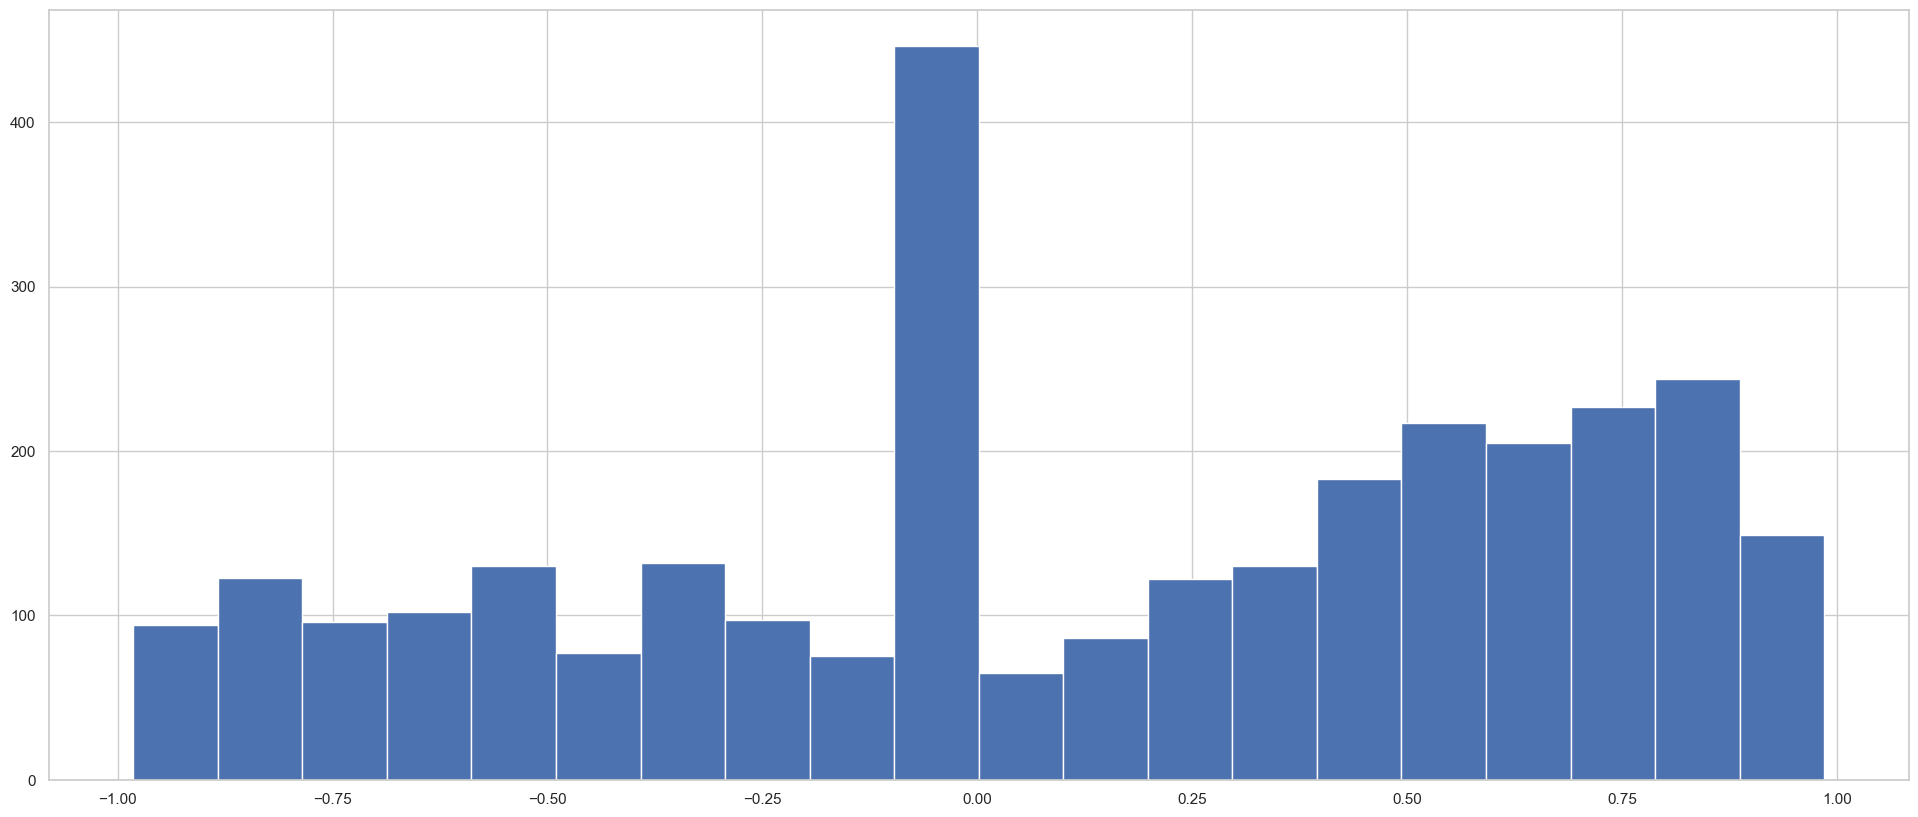

In [159]:
df['sa'].hist(bins=20)

In [161]:
# use the category as row index, the sa as value of the row
for cat in categories:
    df_cat = df[df['category'] == cat]
    df_cat = df_cat[['sa']]
    df_cat = df_cat.rename(columns={'sa':cat})
    if cat == categories[0]:
        # form to a dataframe with category as row index
        df_cat_all = df_cat
    else:
        df_cat_all = pd.concat([df_cat_all, df_cat], axis=0)


In [162]:
df_cat_all.describe()

,PARENTING,TRAVEL,BUSINESS & FINANCES,POLITICS,GROUPS VOICES,ENTERTAINMENT,WELLNESS,FOOD & DRINK,STYLE & BEAUTY,WORLD NEWS
count,359.000000,276.000000,229.000000,399.000000,312.000000,332.000000,374.000000,207.000000,289.000000,223.000000
mean,0.205934,0.376942,0.090801,-0.034962,0.079793,0.095355,0.199134,0.344087,0.336478,-0.287192
std,0.553161,0.483460,0.561072,0.539818,0.534356,0.507461,0.594891,0.449977,0.423434,0.501908
min,-0.956100,-0.954500,-0.958400,-0.978800,-0.976900,-0.952400,-0.981900,-0.900100,-0.820400,-0.969000
25%,-0.226300,0.000000,-0.401900,-0.493900,-0.340000,-0.273200,-0.296000,0.000000,0.000000,-0.754250
50%,0.340000,0.522250,0.000000,0.000000,0.000000,0.000000,0.381800,0.458800,0.421500,-0.361200
75%,0.685500,0.779775,0.624900,0.435700,0.561025,0.530600,0.735100,0.690800,0.680800,0.025800
max,0.984700,0.970200,0.939300,0.921700,0.946000,0.948500,0.979900,0.964300,0.966100,0.985300


In [226]:
cat_mean_values = df_cat_all.mean(axis=0).sort_values(ascending=False)
cat_mean_values

TRAVEL                 0.376942
FOOD & DRINK           0.344087
STYLE & BEAUTY         0.336478
PARENTING              0.205934
WELLNESS               0.199134
ENTERTAINMENT          0.095355
BUSINESS & FINANCES    0.090801
GROUPS VOICES          0.079793
POLITICS              -0.034962
WORLD NEWS            -0.287192
dtype: float64

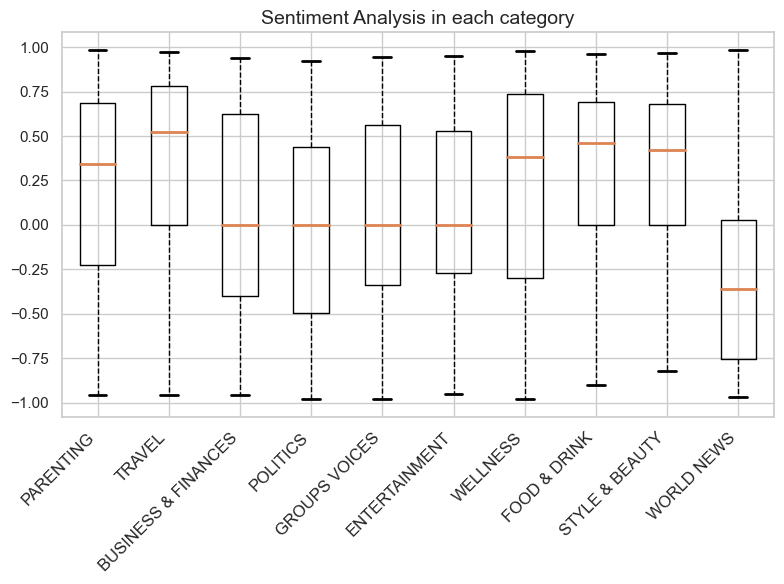

In [177]:

colors = {
    'boxes': 'DarkGreen',
    'whiskers': 'DarkOrange',
    'medians': 'DarkBlue',
    'caps': 'Gray'
}
df_cat_all.plot.box(figsize=(8,6), color = colors, boxprops=dict(linestyle='-'), medianprops=dict(linestyle='-', linewidth=2), whiskerprops=dict(linestyle='--'), capprops=dict(linestyle='-', linewidth=2))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Sentiment Analysis in each category', fontsize=14)
plt.tight_layout()
plt.show()


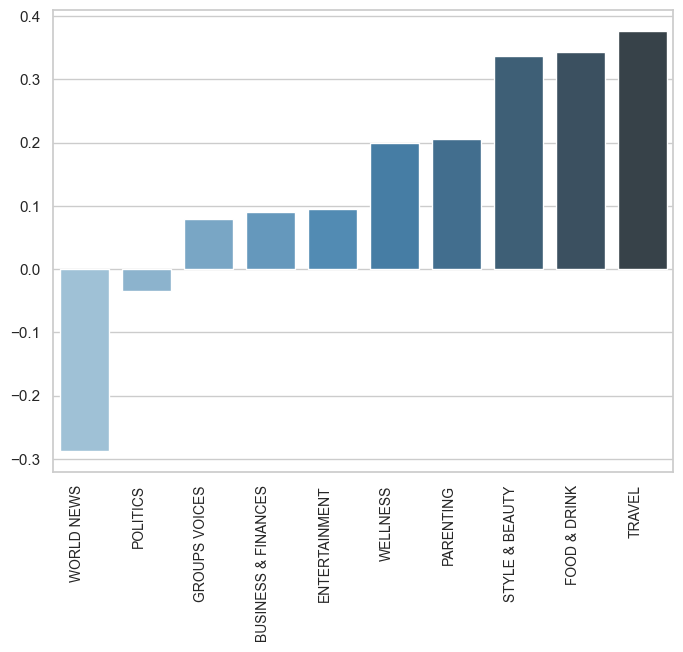

In [233]:
sns.set(style="whitegrid")
sns.set_context({"figure.figsize": (8, 6)})
sns.barplot(x=cat_mean_values.index[::-1], y=cat_mean_values.values[::-1], palette="Blues_d")
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.show()

In [211]:
for i, cat in enumerate(cat_mean_values.keys()):
    print(i, cat)

0 TRAVEL
1 FOOD & DRINK
2 STYLE & BEAUTY
3 PARENTING
4 WELLNESS
5 ENTERTAINMENT
6 BUSINESS & FINANCES
7 GROUPS VOICES
8 POLITICS
9 WORLD NEWS


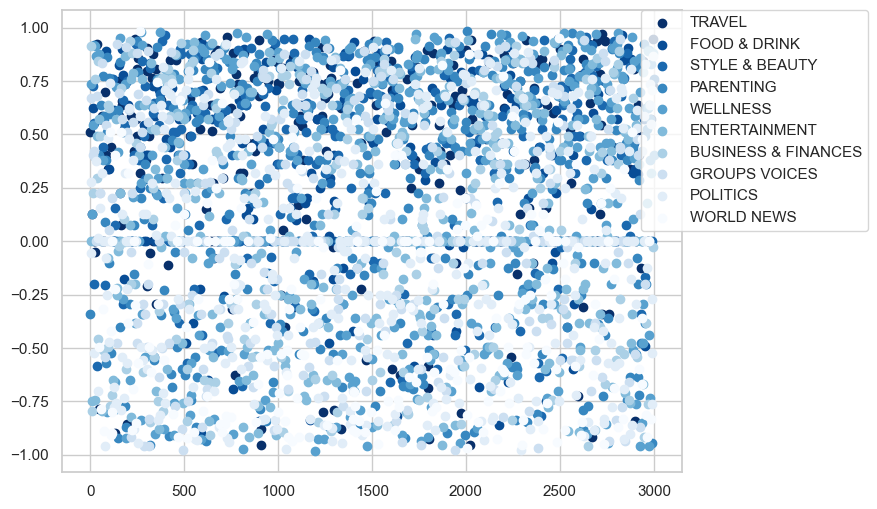

In [234]:
plt.figure(figsize=(8,6))
# assign different for each category
colors = plt.get_cmap('Blues_r')
colors = [colors(i) for i in np.linspace(0, 1, len(cat_mean_values))]
colors = colors
#colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, cat in enumerate(cat_mean_values.keys()):
    df_cat_ = df[df['category'] == cat]
    plt.scatter(df_cat_.index, df_cat_['sa'], color=colors[i], label=cat)
    
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0.)
plt.show()

### normalize the SA

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# should normalize by category
for cat in categories:
    df_cat = df[df['category'] == cat]
    df['sa_normalized'][df['category']==cat] = scaler.fit_transform(df_cat[['sa']]).reshape(-1)


/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_26572/2521965206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sa_normalized'][df['category']==cat] = scaler.fit_transform(df_cat[['sa']]).reshape(-1)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_26572/2521965206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sa_normalized'][df['category']==cat] = scaler.fit_transform(df_cat[['sa']]).reshape(-1)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_26572/2521965206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

0   -0.988313
1    0.276964
2    1.466474
3    0.575846
4    1.107233
Name: sa_normalized, dtype: float64

In [248]:
for cat in categories:
    df_cat = df[df['category'] == cat]
    df_cat = df_cat[['sa_normalized']]
    df_cat = df_cat.rename(columns={'sa_normalized':cat})
    if cat == categories[0]:
        # form to a dataframe with category as row index
        df_cat_all_norm = df_cat
    else:
        df_cat_all_norm = pd.concat([df_cat_all_norm, df_cat], axis=0)

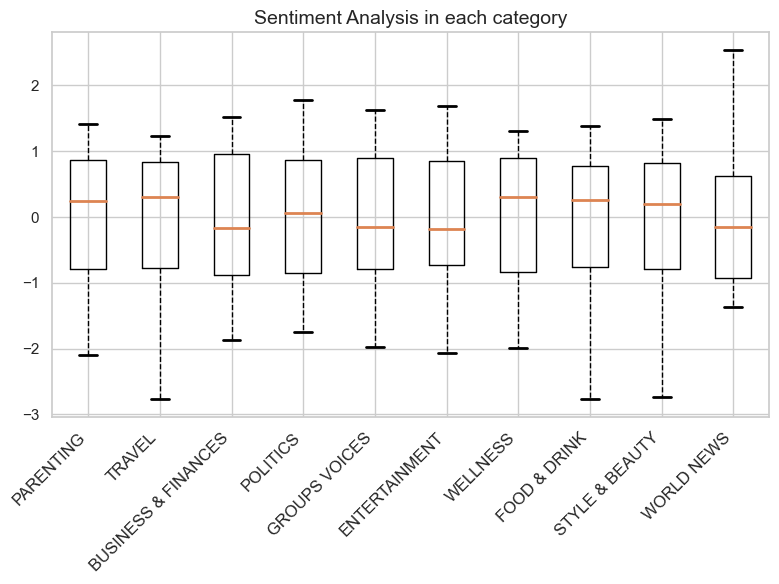

In [263]:
df_cat_all_norm.plot.box(figsize=(8,6), color = colors, boxprops=dict(linestyle='-'), medianprops=dict(linestyle='-', linewidth=2), whiskerprops=dict(linestyle='--'), capprops=dict(linestyle='-', linewidth=2))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Sentiment Analysis in each category', fontsize=14)
plt.tight_layout()
plt.show()

In [253]:
df_cat_all_norm.head()

,PARENTING,TRAVEL,BUSINESS & FINANCES,POLITICS,GROUPS VOICES,ENTERTAINMENT,WELLNESS,FOOD & DRINK,STYLE & BEAUTY,WORLD NEWS
0,-0.988313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1.292867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,1.182438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,0.354761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,0.780185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
cat_mean_values_norm = df_cat_all_norm.mean(axis=0).sort_values(ascending=False)
cat_mean_values_norm

WORLD NEWS             6.970010e-17
STYLE & BEAUTY         3.995266e-17
POLITICS               3.561618e-17
GROUPS VOICES          2.846726e-18
BUSINESS & FINANCES    0.000000e+00
ENTERTAINMENT         -1.070094e-17
TRAVEL                -1.769921e-17
FOOD & DRINK          -2.574430e-17
WELLNESS              -5.937022e-17
PARENTING             -8.164314e-17
dtype: float64

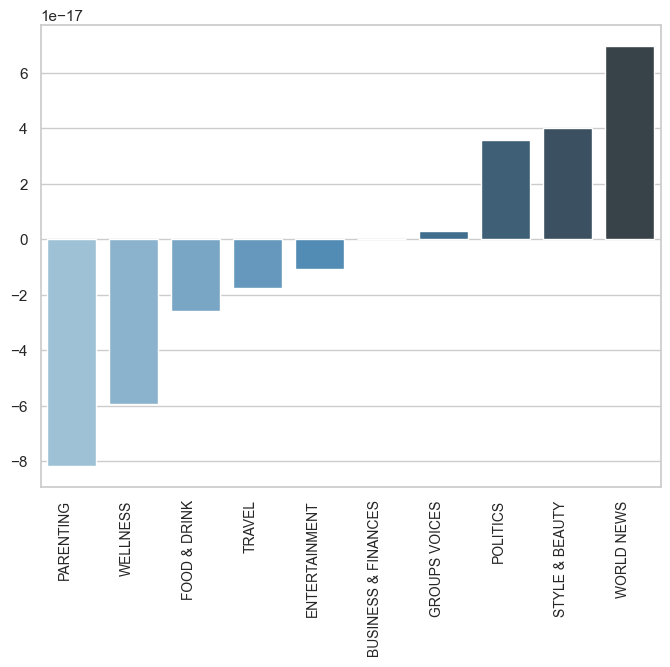

In [251]:
sns.set(style="whitegrid")
sns.set_context({"figure.figsize": (8, 6)})
sns.barplot(x=cat_mean_values_norm.index[::-1], y=cat_mean_values_norm.values[::-1], palette="Blues_d")
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.show()

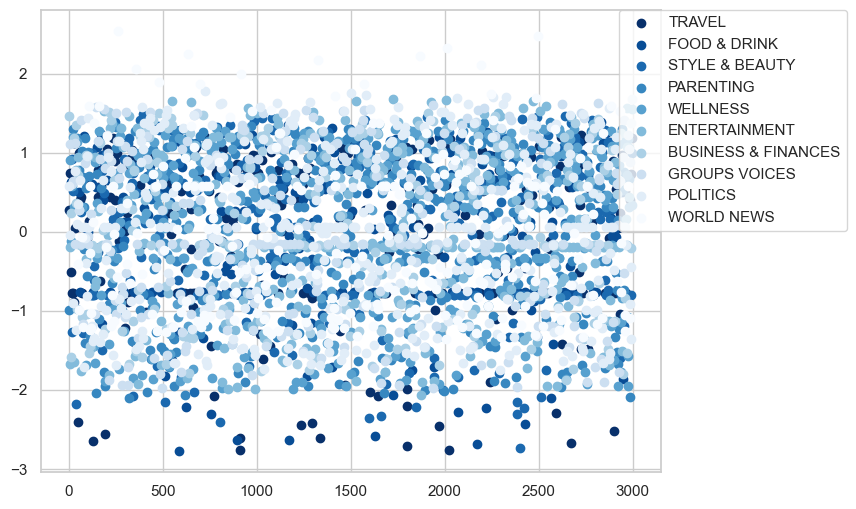

In [264]:
plt.figure(figsize=(8,6))
# assign different for each category
colors = plt.get_cmap('Blues_r')
colors = [colors(i) for i in np.linspace(0, 1, len(cat_mean_values))]
colors = colors
#colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, cat in enumerate(cat_mean_values.keys()):
    df_cat_ = df[df['category'] == cat]
    plt.scatter(df_cat_.index, df_cat_['sa_normalized'], color=colors[i], label=cat)
    
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0.)
plt.show()

### Gaussian Processing to predict the categories

In [265]:
# import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [267]:
X = df['sa'].values.reshape(-1,1)
y = df['category'].values.reshape(-1,1)
order_categories = cat_mean_values.keys()
le = LabelEncoder()
le.fit(order_categories)
y = le.transform(y).reshape(-1,1)

/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[4],
       [7],
       [0],
       ...,
       [1],
       [8],
       [6]])

In [281]:
# save data to csv
df[['text', 'category', 'sa', 'sa_normalized']].to_csv('data_3k_sa.csv', index=False)

### Train LogisticModel

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### TfidfVectorizer

In [75]:
# transform the categories to numbers by sklearn LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


array([4, 7, 0, ..., 1, 8, 6])

In [94]:
le = LabelEncoder()
y_label = le.fit_transform(y)

In [195]:

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_val_vec = tfidf_vectorizer.transform(X_val)
X_test_vec = tfidf_vectorizer.transform(X_test)
lgr = LogisticRegression()
lgr.fit(X_train_vec, y_train)
y_pred = lgr.predict(X_test_vec) # predict on the test set
metrics.accuracy_score(y_test, y_pred)

shape of TF-IDF embedding: (600, 4729)


0.4325

In [196]:
class_names = le.classes_.tolist()

In [197]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.tight_layout()
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks(range(10), class_names, rotation=0)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


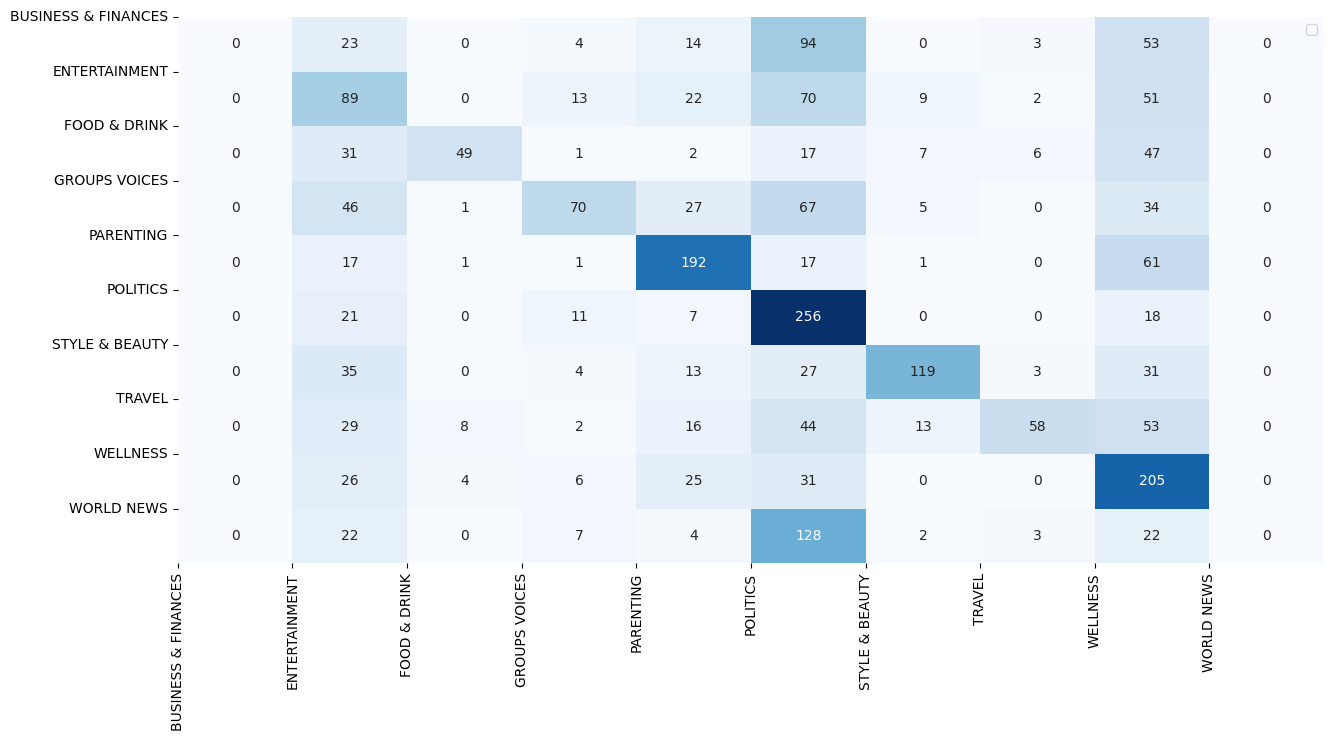

In [198]:
# plot the confusion matrix
import seaborn as sns
plot_confusion_matrix(y_test, y_pred)

##### try parameters
Apparently, the customized tfidf vectorizer performs good.

In [199]:

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_label, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,2)  # Use both unigrams and bigrams
)

X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

# Logistic Regression Model
lgr = LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=100)
lgr.fit(X_train_vec, y_train)

# Predictions on the test set
y_pred = lgr.predict(X_test_vec)

# Calculate and print accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.85375


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


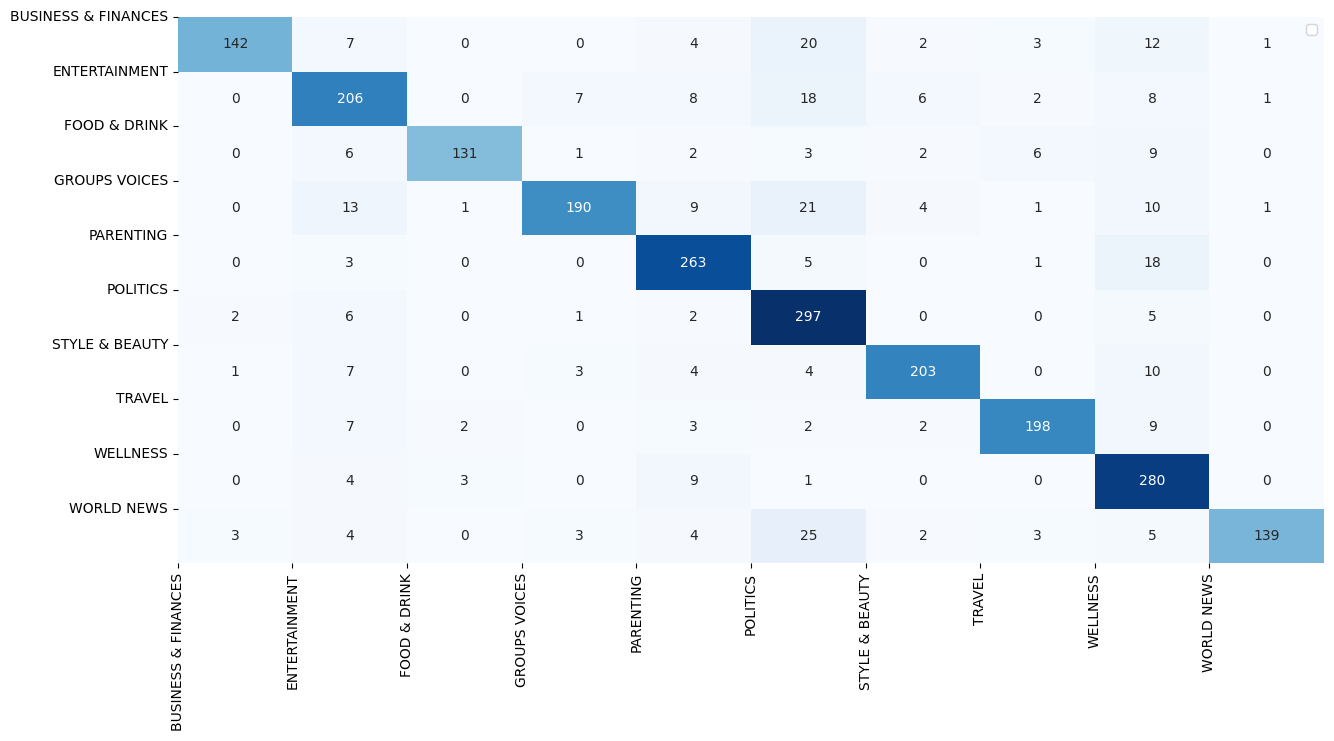

In [200]:
y_pred = lgr.predict(X_test_vec) # predict on the test set
metrics.accuracy_score(y_test, y_pred)
class_names = le.classes_.tolist()
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

##### K-fold CrossValidation

In [174]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [182]:
df = pd.read_csv('news_10_category_cleaned_3k.csv')
X = df['text']
y = df['category']
y_label = LabelEncoder().fit_transform(y)

In [163]:
vectorizer = TfidfVectorizer()
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=42)
model = LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=100)
kfold = skf.split(X_train, y_train)
pipl = make_pipeline(vectorizer, model)
scores = []
for k, (train, test) in enumerate(kfold):
    pipl.fit(X[train], y_label[train])
    score = pipl.score(X[test], y_label[test])
    scores.append(score)
    print(f"Fold {k+1}: {score}")
avg_score = np.mean(scores)
print(f"Average Score: {avg_score}")


Fold 1: 0.5947521865889213
Fold 2: 0.6005830903790087
Fold 3: 0.5451895043731778
Fold 4: 0.6005830903790087
Fold 5: 0.5685131195335277
Fold 6: 0.6005830903790087
Fold 7: 0.5789473684210527


shape of TF-IDF embedding: (600, 1701)


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partiti

Best parameters set: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: nan
accuracy: 0.13041666666666665


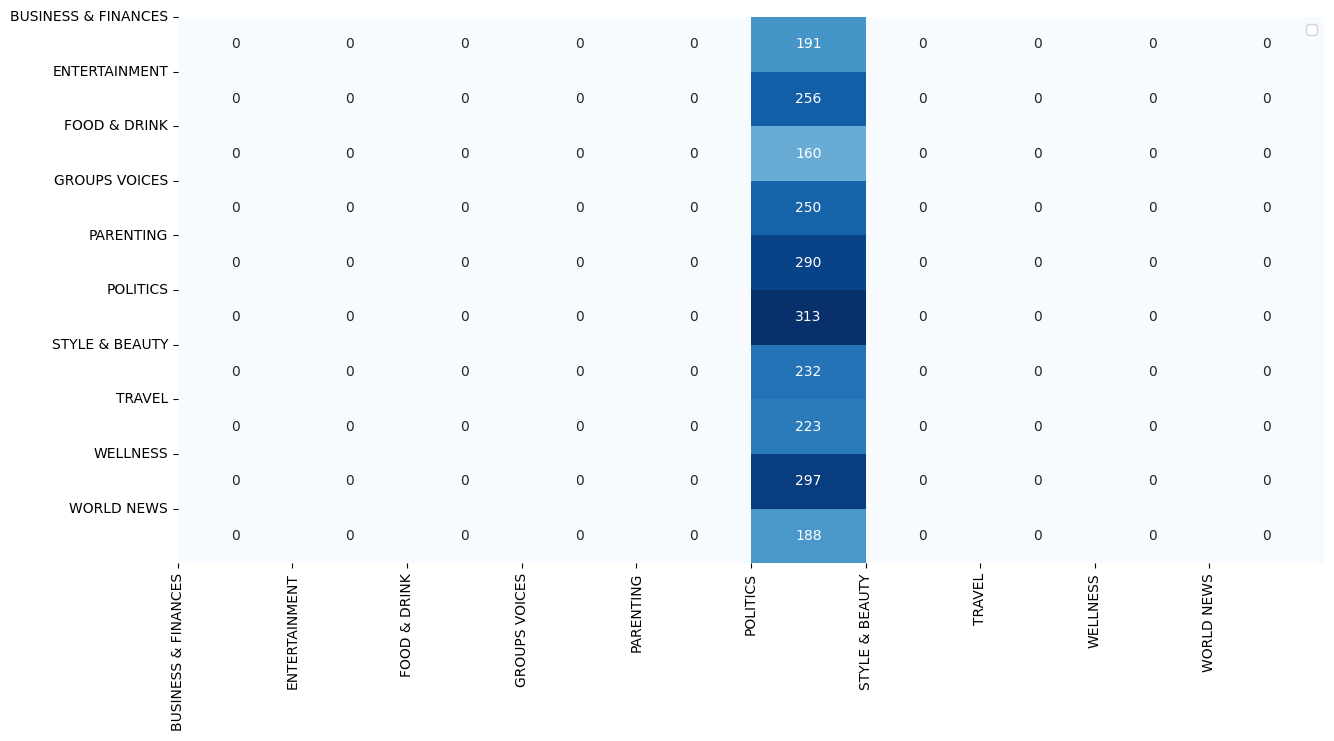

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,2)  # Use both unigrams and bigrams
)
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
param_lrg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'newton-cg'],
}
model = LogisticRegression()
gs_lrg = GridSearchCV(model, param_lrg, cv=5, verbose=0, scoring='roc_auc')
gs_lrg.fit(X_train_vec, y_train)
y_pred = gs_lrg.predict(X_test_vec) # predict on the test set
print("Best parameters set:", gs_lrg.best_params_)
print("Best score:", gs_lrg.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# Grid Search failed to try
param_log = {
    #'TfidfVectorizer__max_df': [0.7, 0.8, 0.9],  # Ignore terms that appear in more than 80% of documents
    #'TfidfVectorizer__min_df': [2, 3, 4],    # Ignore terms that appear in fewer than 2 documents，, 'lbfgs', 'sag', 'newton-cholesky'
    #'TfidfVectorizer__ngram_range':[(1,2)],
    'LogisticRegression__penalty': ['l1', 'l2'],
    'LogisticRegression__C': [0.01, 0.1, 1, 10],
    'LogisticRegression__solver': ['liblinear', 'saga', 'newton-cg']
}

grid_search = make_pipeline(TfidfVectorizer(),GridSearchCV(LogisticRegression(), param_log, cv=5, verbose=3, scoring='accuracy'))

grid_search.fit(X, y_label)
#print("Best parameters set:", grid_search.best_params_)
print(grid_search)
print("Best score:", grid_search.best_score_)

### RandomForestClassifier

In [190]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
metrics.accuracy_score(y_test, y_pred)

shape of TF-IDF embedding: (600, 4729)


0.41375

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


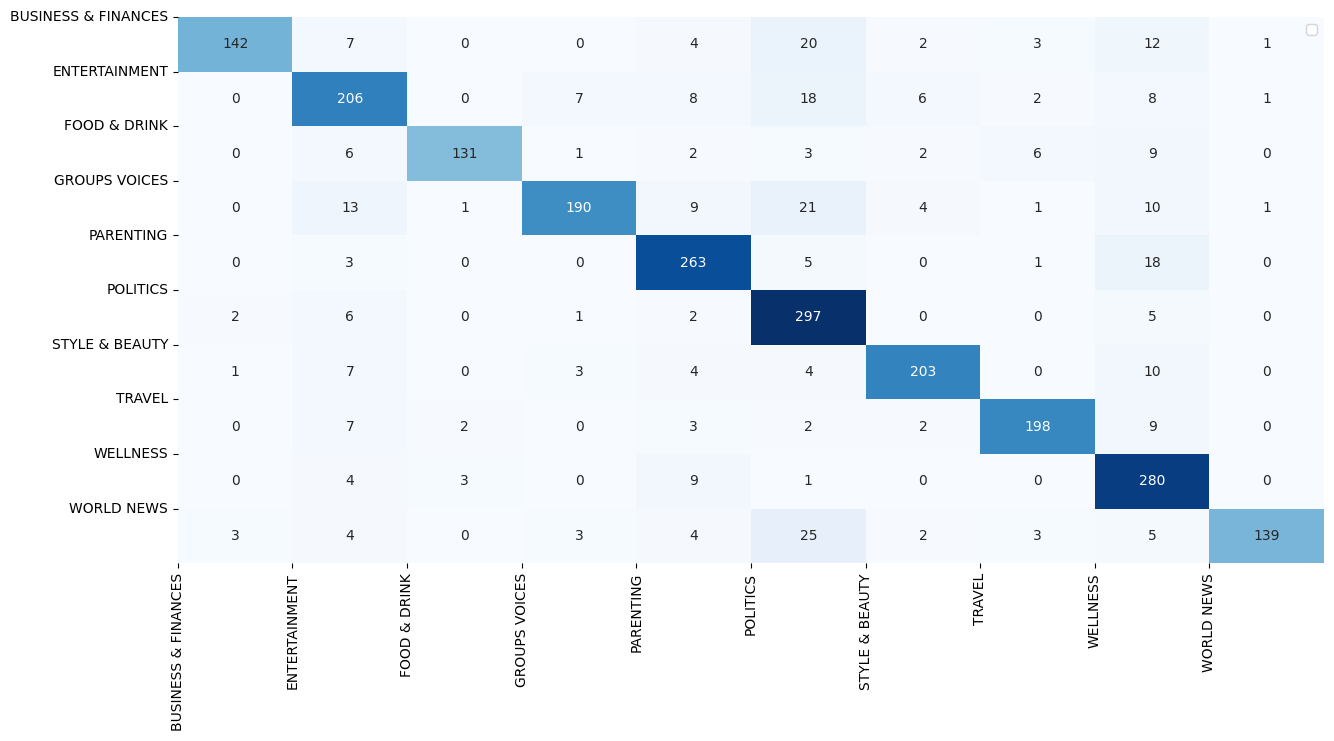

In [201]:
plot_confusion_matrix(y_test, y_pred)

shape of TF-IDF embedding: (600, 1520)


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatc

Best parameters set: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best score: 0.3366666666666667
accuracy: 0.3883333333333333


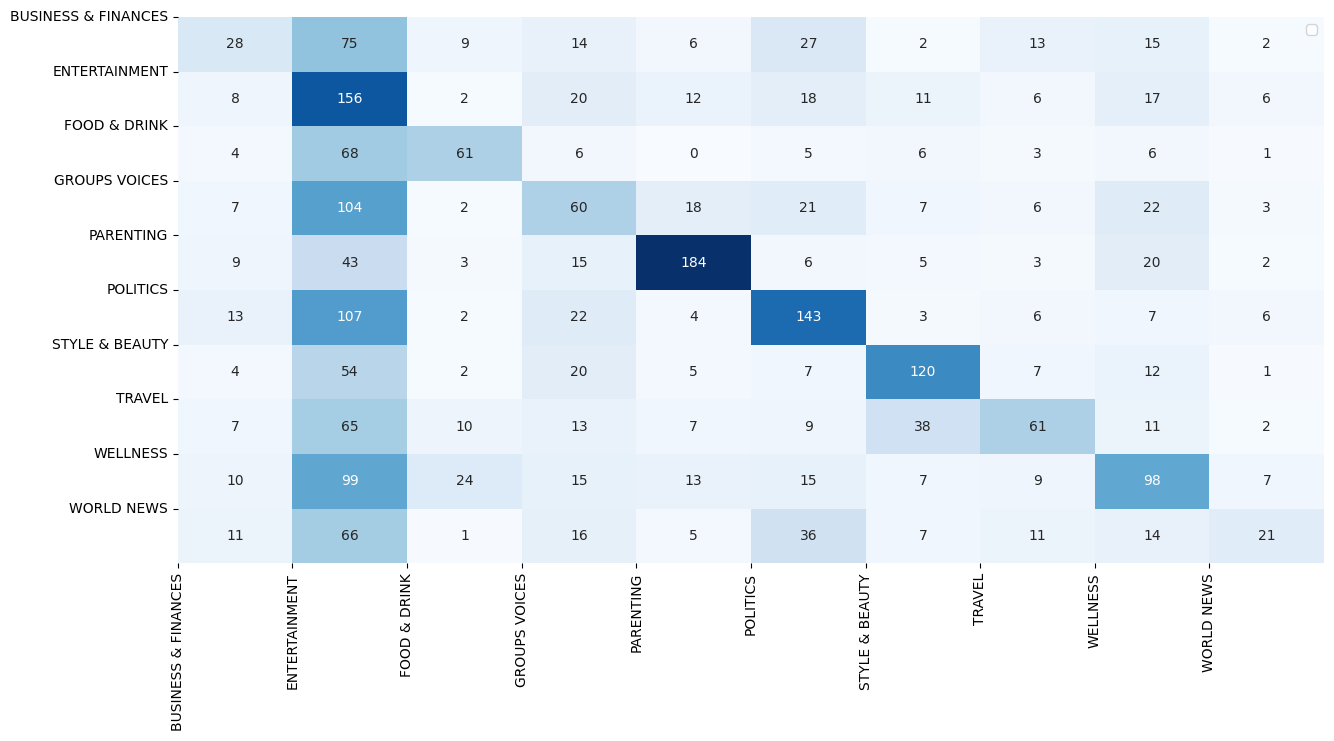

In [212]:
# with parameters
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,1)  # Use both unigrams and bigrams
)
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
param_rfc = {
    'n_estimators': [10, 110, 10],  # the number of trees in the forest
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': range(2, 10, 2),
    'min_samples_leaf': range(1, 10, 2),
    'max_features': ['sqrt', 'log2']
}
model = RandomForestClassifier()
gs_rfc = GridSearchCV(model, param_rfc, cv=5, verbose=0, scoring='accuracy')
gs_rfc.fit(X_train_vec, y_train)
y_pred = gs_rfc.predict(X_test_vec) # predict on the test set
print("Best parameters set:", gs_rfc.best_params_)
print("Best score:", gs_rfc.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best parameters set: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: nan
accuracy: 0.4141666666666667


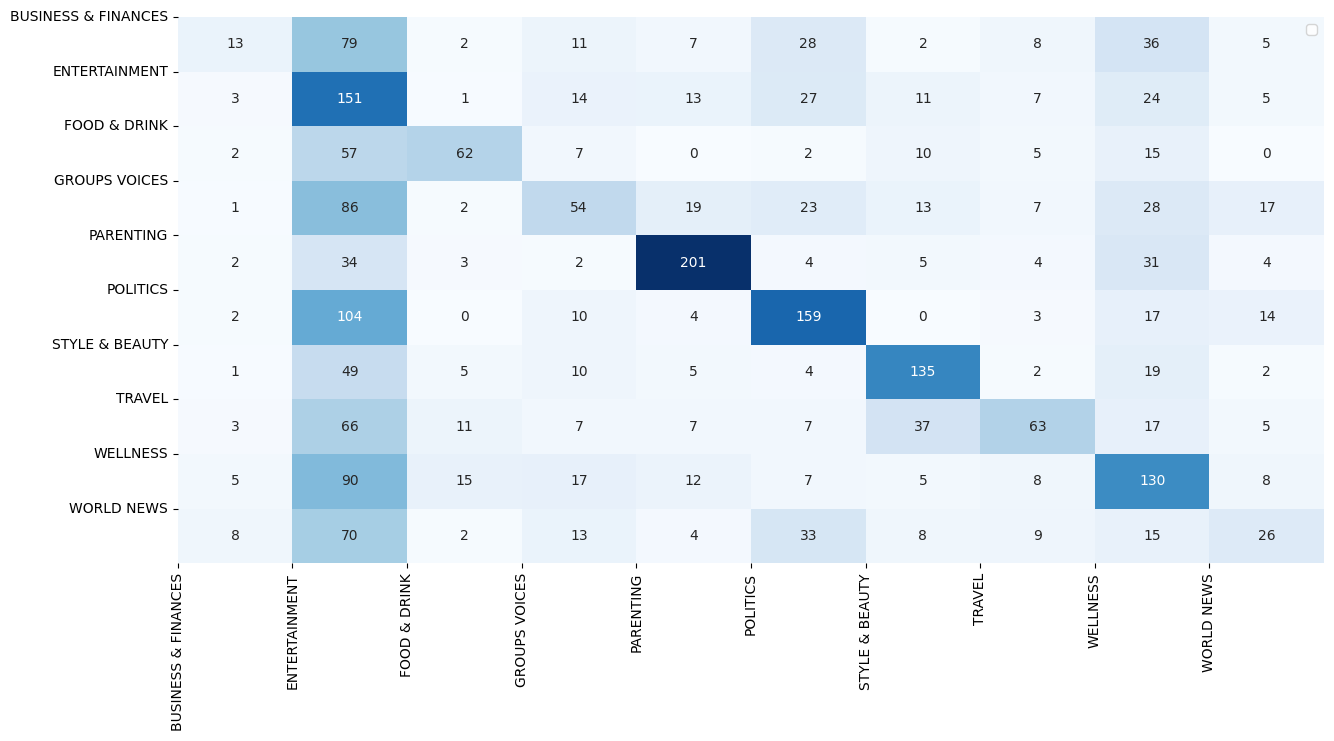

In [209]:
print("Best parameters set:", gs_rfc.best_params_)
print("Best score:", gs_rfc.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### SVM

In [213]:
from sklearn.svm import LinearSVC

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


shape of TF-IDF embedding: (600, 4729)
accuracy: 0.4920833333333333


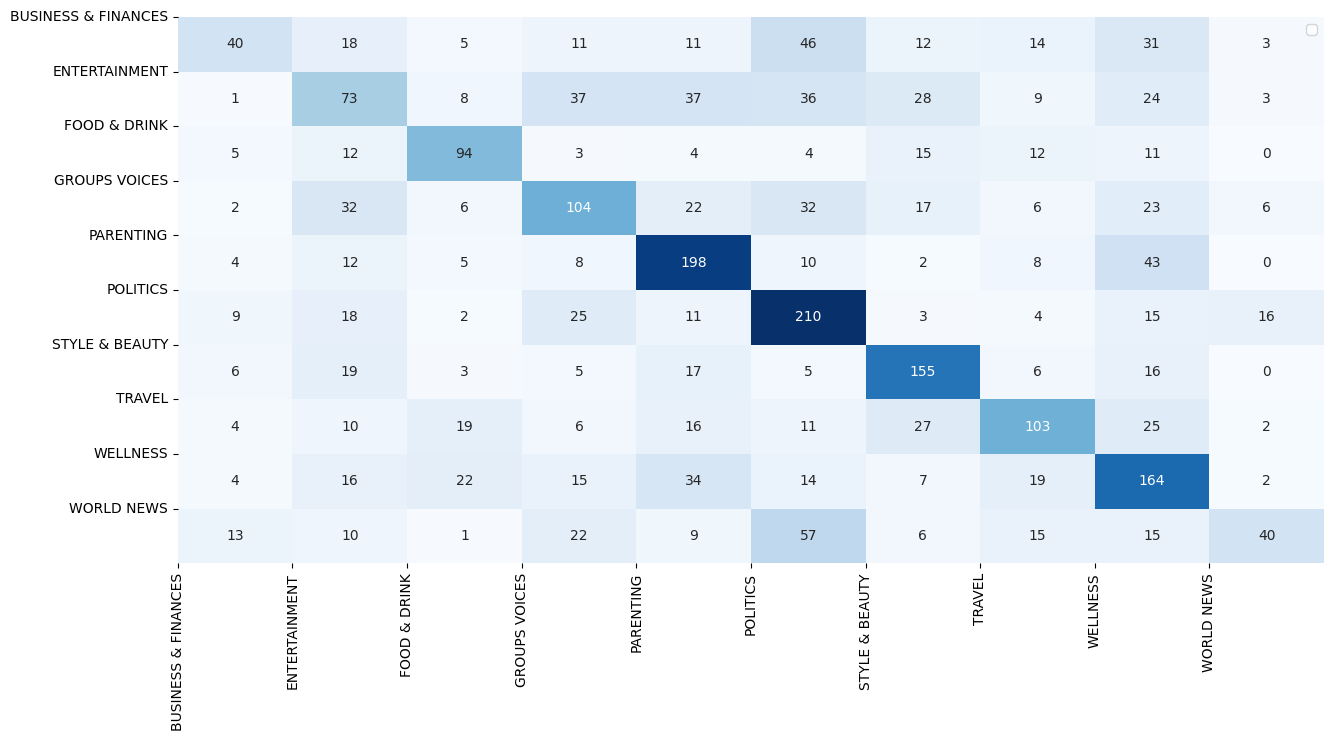

In [215]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
model = LinearSVC()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/sit

Best parameters set: {'C': 1, 'multi_class': 'crammer_singer'}
Best score: 0.47833333333333333
accuracy: 0.48


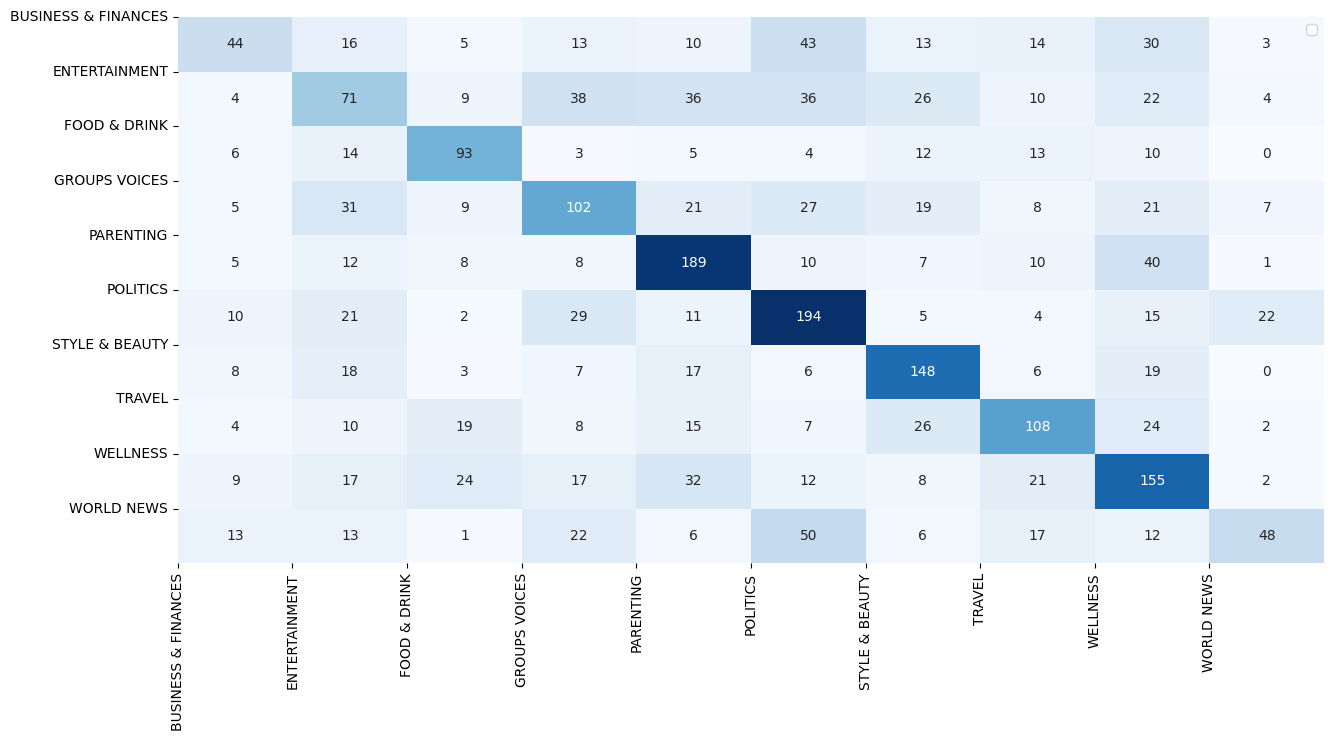

In [225]:
param_rfc = {
    'C': [0.01, 0.1, 1, 10],
    'multi_class': ['ovr', 'crammer_singer']
}
model = LinearSVC()
gs_rfc = GridSearchCV(model, param_rfc, cv=5, verbose=0, scoring='accuracy')
gs_rfc.fit(X_train_vec, y_train)
y_pred = gs_rfc.predict(X_test_vec) # predict on the test set
print("Best parameters set:", gs_rfc.best_params_)
print("Best score:", gs_rfc.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### RidgeClassifier

In [216]:
from sklearn.linear_model import RidgeClassifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy: 0.49666666666666665


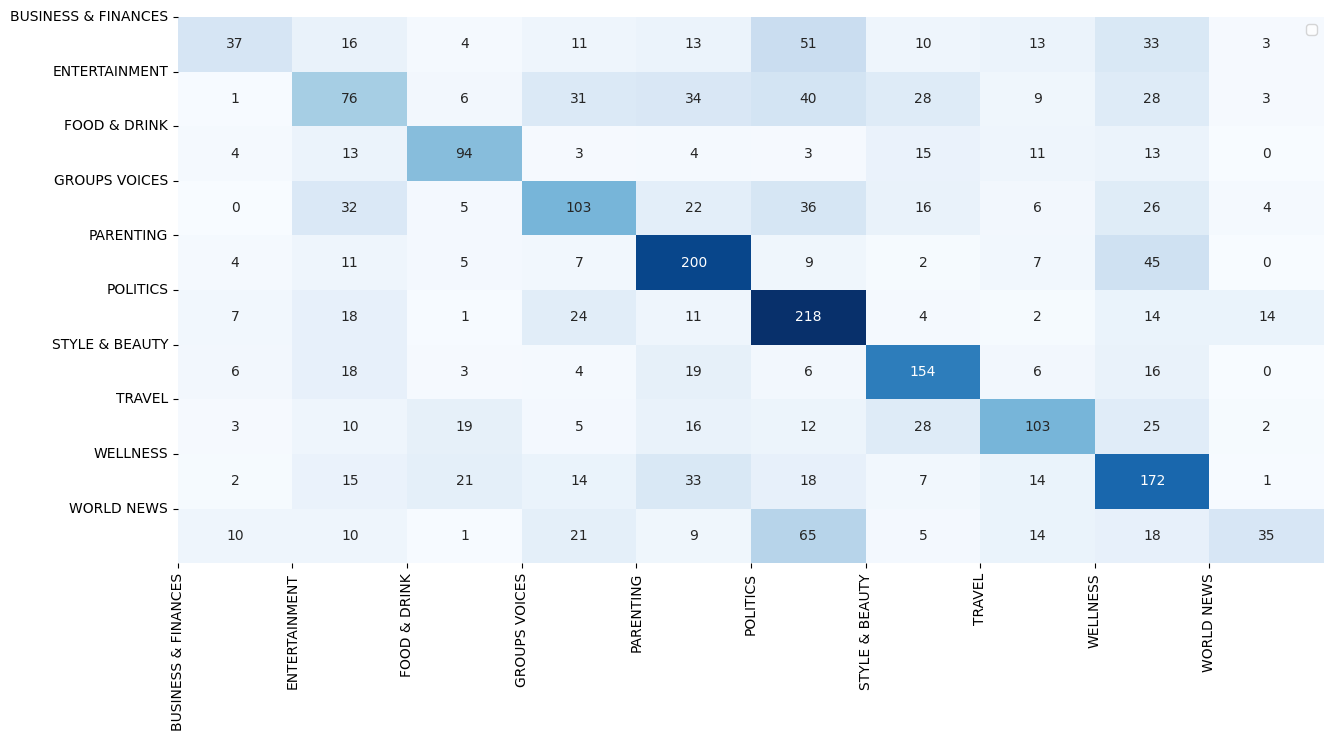

In [217]:
model = RidgeClassifier()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### XGBClassifier

In [220]:
from xgboost.sklearn import XGBClassifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy: 0.35875


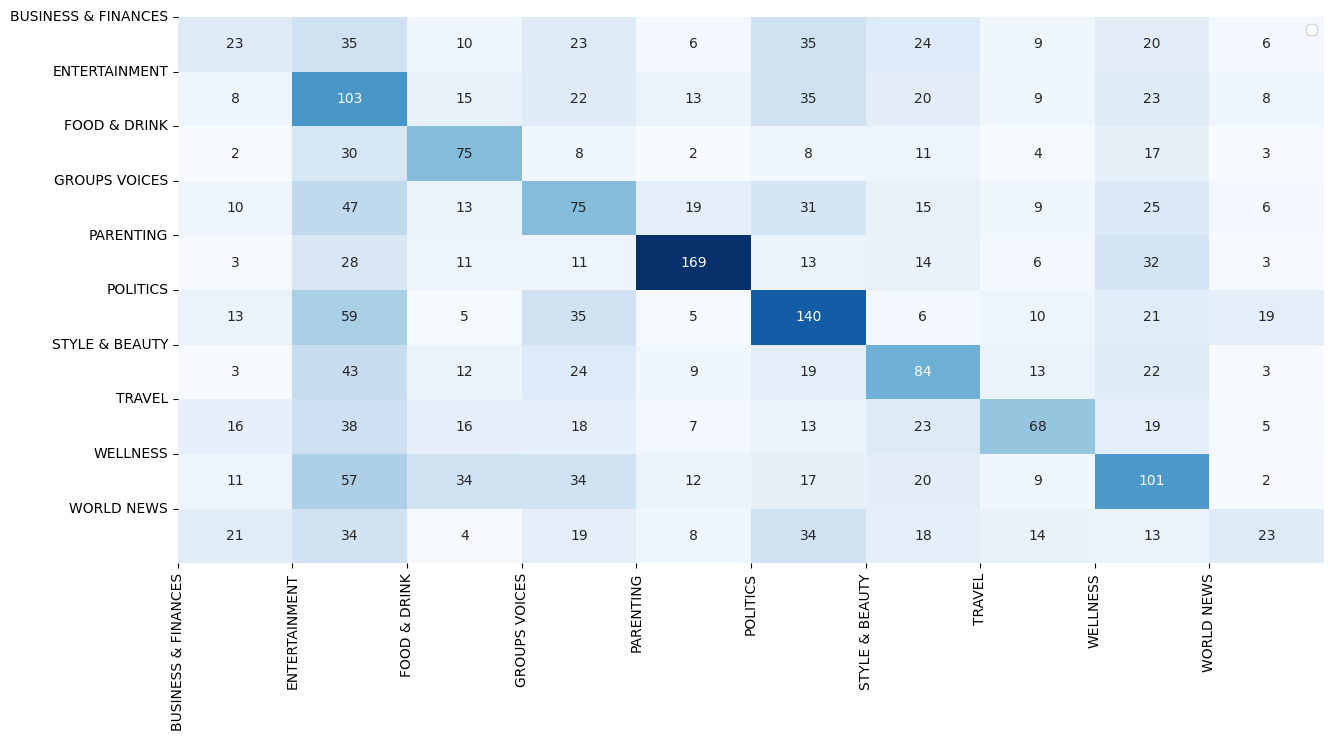

In [221]:
model = XGBClassifier(objective = 'multi:softprob')
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)